In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [2]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Water_Height", "Outflow", "Power_P1", "Power_P2", "Effect_P2", "Effect_P1", "Power_P3", "Effect_p3"]

In [3]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

def minutes_to_date_timee(minutes: pd.Series, start_date: datetime):
    return pd.to_timedelta(minutes, unit='m')

In [4]:
# Read in the data PST
pump = "PST240"
year = "2020"
month = "Maj"

pump = pd.read_csv(f"../data/HistoricData/{pump}_{year}_{month}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
pump.columns = columns
pump["DateTime"] = pd.to_datetime(pump["DateTime"], format="%d-%m-%Y %H:%M:%S,%f")

In [5]:
pump["Volume"] = water_level_to_volume(pump["Water_Height"], "PST237")

In [6]:
pump

DateTime  Water_Height  Outflow  Power_P1  Power_P2  \
0      2020-05-06 11:00:00.000         1.126     52.8     24.28      0.00   
1      2020-05-06 11:00:00.000         1.126     52.8     24.28      0.00   
2      2020-05-06 11:08:54.596         0.377      0.0      0.00      0.06   
3      2020-05-06 11:08:59.323         0.378      0.0      0.00      0.06   
4      2020-05-06 11:09:04.471         0.375      0.0      0.00      0.06   
...                        ...           ...      ...       ...       ...   
484455 2020-05-31 23:59:41.840         0.373      0.0      0.00      0.06   
484456 2020-05-31 23:59:46.240         0.372      0.0      0.00      0.06   
484457 2020-05-31 23:59:50.514         0.373      0.0      0.00      0.06   
484458 2020-05-31 23:59:54.882         0.372      0.0      0.00      0.06   
484459 2020-05-31 23:59:59.297         0.375      0.0      0.00      0.06   

        Effect_P2  Effect_P1  Power_P3  Effect_p3       Volume  
0            0.01      11.33      0.00       0.01  1109.339092  
1            0.01      11.33      0.00       0.01  1109.339092  
2            0.25       0.04      0.02       0.24   371.421703  
3            0.24       0.04      0.02       0.25   372.406906  
4            0.23       0.01      0.02       0.24   369.451296  
...           ...        ...       ...        ...          ...  
484455       0.24       0.31      0.02       0.24   367.480889  
484456       0.23       0.31      0.02       0.24   366.495686  
484457       0.23       0.31      0.02       0.24   367.480889  
484458       0.23       0.31      0.02       0.24   366.495686  
484459       0.24       0.31      0.02       0.23   369.451296  

[484460 rows x 10 columns]

# Pumps vs Outflow looks good overall
Sometimes outflow is a little delayed after the pump started.

Text(0.5, 0, 'Time')

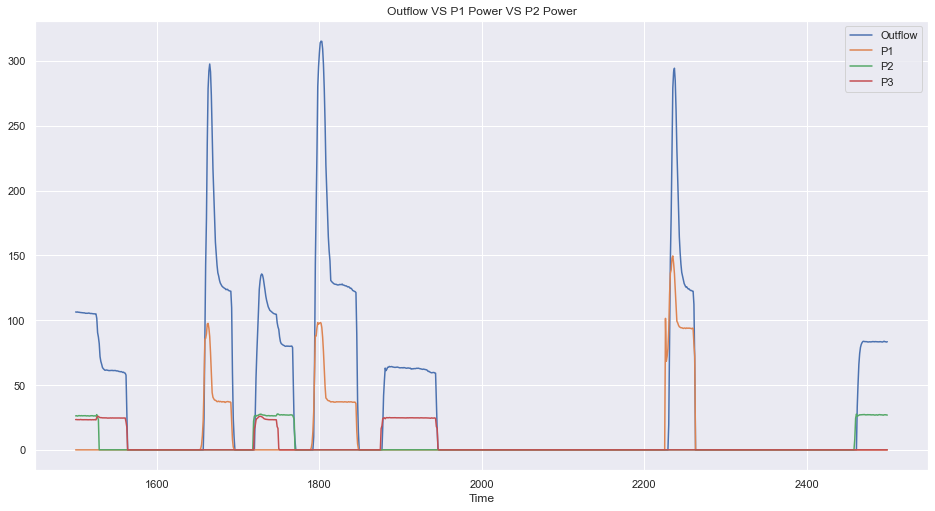

In [15]:
fig, ax = plt.subplots()
pump.Outflow[1500:2500].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][1500:2500].plot()
pump["Power_P2"][1500:2500].plot()
pump["Power_P3"][1500:2500].plot()

ax.legend(["Outflow","P1", "P2", "P3"], loc="upper right")
ax.set_xlabel("Time")

# Water height vs Outflow 
Seems to be good, little hard to see because of the scale. 

Text(0.5, 0, 'Time')

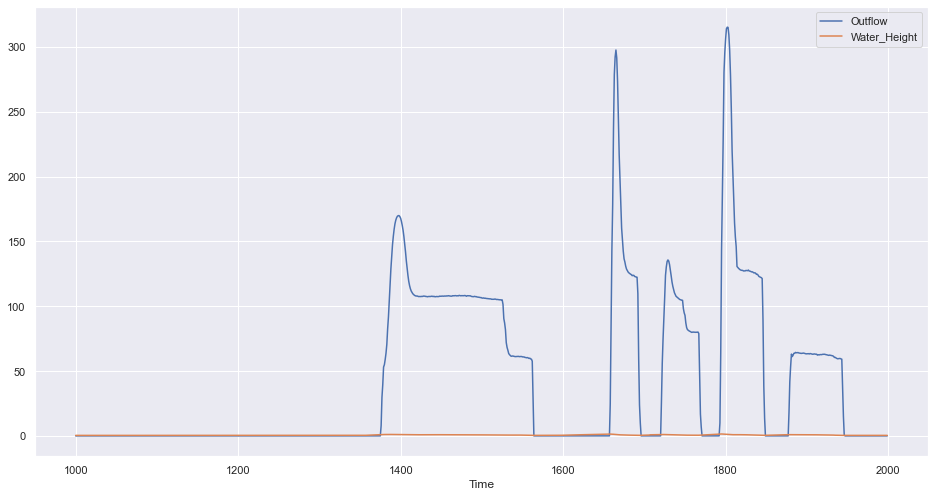

In [16]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Outflow"][1000:2000].plot()
pump["Water_Height"][1000:2000].plot()
# PST237["Effect_P2"][1000:2000].plot()
ax.legend(["Outflow","Water_Height"], loc="upper right")
ax.set_xlabel("Time")

# General Findings
- From the interactins -> Outflow can stay zero with water level going up to 1 meter. Normally the pump shold already work
- Not a full month dates start at the 6'th of May

In [17]:
profile = ProfileReport(pump, title="Pandas Profiling Report",  explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Text(0.5, 1.0, 'Outflow VS Water_Height')

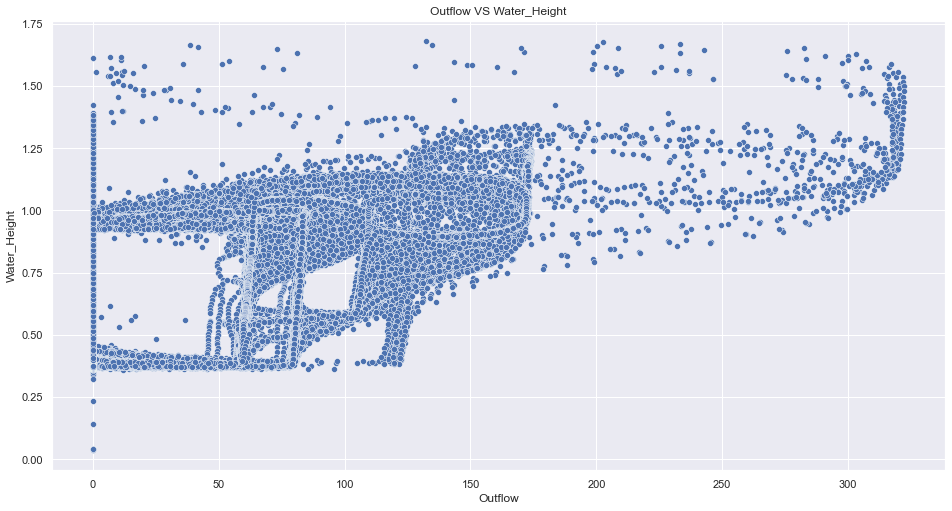

In [30]:
ax = sns.scatterplot(x="Outflow", y="Water_Height", data=pump)
ax.set_title("Outflow VS Water_Height")


array([[<AxesSubplot:title={'center':'Power_P1'}>]], dtype=object)

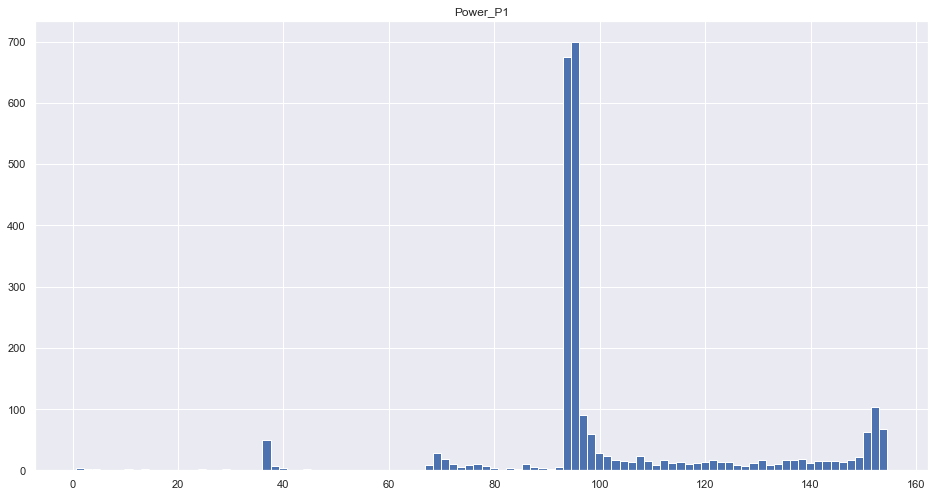

In [10]:
pump[(pump.Power_P1 > 0.5) & (pump.Power_P1 < 300)].hist(column="Power_P1", bins=100)

array([[<AxesSubplot:title={'center':'Power_P2'}>]], dtype=object)

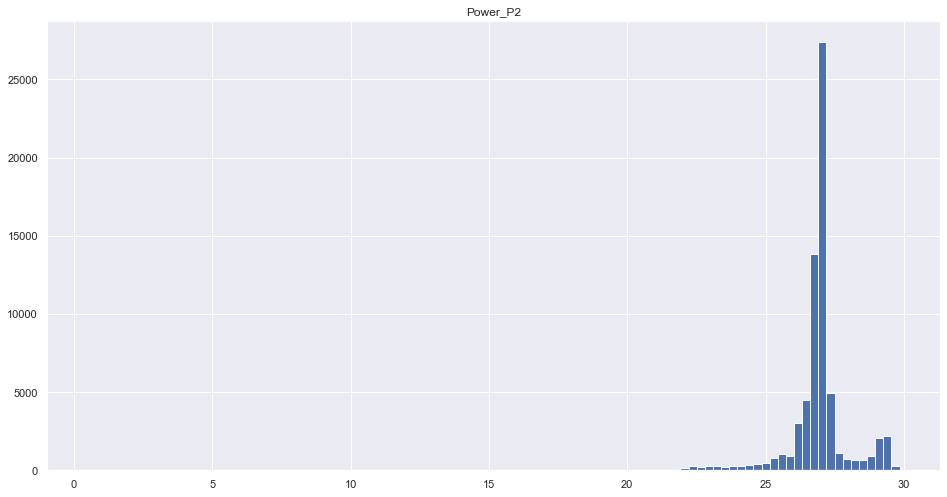

In [11]:
pump[(pump.Power_P2 > 0.5) & (pump.Power_P1 < 300)].hist(column="Power_P2", bins=100)

array([[<AxesSubplot:title={'center':'Power_P3'}>]], dtype=object)

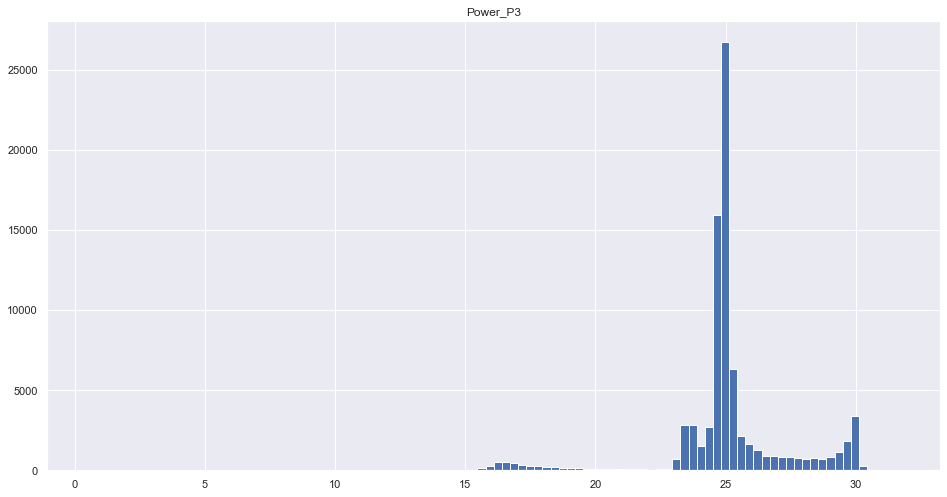

In [12]:
pump[(pump.Power_P3 > 0.5) & (pump.Power_P3 < 300)].hist(column="Power_P3", bins=100)

In [17]:
pump

DateTime  Water_Height  Outflow  Power_P1  Power_P2  \
0      2020-05-06 11:00:00.000         1.126     52.8     24.28      0.00   
1      2020-05-06 11:00:00.000         1.126     52.8     24.28      0.00   
2      2020-05-06 11:08:54.596         0.377      0.0      0.00      0.06   
3      2020-05-06 11:08:59.323         0.378      0.0      0.00      0.06   
4      2020-05-06 11:09:04.471         0.375      0.0      0.00      0.06   
...                        ...           ...      ...       ...       ...   
484455 2020-05-31 23:59:41.840         0.373      0.0      0.00      0.06   
484456 2020-05-31 23:59:46.240         0.372      0.0      0.00      0.06   
484457 2020-05-31 23:59:50.514         0.373      0.0      0.00      0.06   
484458 2020-05-31 23:59:54.882         0.372      0.0      0.00      0.06   
484459 2020-05-31 23:59:59.297         0.375      0.0      0.00      0.06   

        Effect_P2  Effect_P1  Power_P3  Effect_p3       Volume  
0            0.01      11.33      0.00       0.01  1109.339092  
1            0.01      11.33      0.00       0.01  1109.339092  
2            0.25       0.04      0.02       0.24   371.421703  
3            0.24       0.04      0.02       0.25   372.406906  
4            0.23       0.01      0.02       0.24   369.451296  
...           ...        ...       ...        ...          ...  
484455       0.24       0.31      0.02       0.24   367.480889  
484456       0.23       0.31      0.02       0.24   366.495686  
484457       0.23       0.31      0.02       0.24   367.480889  
484458       0.23       0.31      0.02       0.24   366.495686  
484459       0.24       0.31      0.02       0.23   369.451296  

[484460 rows x 10 columns]